In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/데이콘/태양광'

/content/drive/MyDrive/데이콘/태양광


In [3]:
# 데이터 불러오기
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963


In [5]:
test.head()

,ID,DHI,DNI,WS,RH,T
0,1,0.300661,0.500871,4.272917,0.005448,-0.556057
1,2,0.595151,0.761307,4.385417,-1.171177,0.909985
2,3,0.069508,0.535166,1.795833,0.866136,-0.970577
3,4,0.758707,0.406851,3.597917,0.263797,-0.171982
4,5,0.098751,0.772563,2.279167,-0.915363,-0.783224


In [6]:
# 데이터 확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      730 non-null    int64  
 1   DHI     730 non-null    float64
 2   DNI     730 non-null    float64
 3   WS      730 non-null    float64
 4   RH      730 non-null    float64
 5   T       730 non-null    float64
 6   TARGET  730 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.0 KB


# 데이터 변수
 - ID
 - DHI : 산란 일사량 태양광이 대기에 의해 산란되어 지표면에 도달하는 빛의 양
 - DNI : 직달일사량 대기를 통과하고 구름에 가려지지 않은 상태에서 태양으로부터 직접 수직으로 도달하는 태양 복사 에너지의 양
 - WS : 풍속
 - RH : 상대 습도 공기 중의 수증기 양
 - T : 온도
 - TARGET

In [7]:
# 데이터 열 확인
train.columns

Index(['ID', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET'], dtype='object')

In [8]:
# 기술통계량 확인
train.describe()

,ID,DHI,DNI,WS,RH,T,TARGET
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.353680,0.449832,2.456610,-0.015374,0.005201,17.766240
std,210.877136,0.242069,0.238223,0.894079,1.001358,1.005426,7.852125
min,1.000000,0.000000,0.000810,0.897917,-2.269194,-2.628657,1.958976
25%,183.250000,0.145922,0.279639,1.855208,-0.714420,-0.813083,11.296985
50%,365.500000,0.308450,0.444305,2.276042,-0.064874,-0.053716,17.238159
75%,547.750000,0.535709,0.628943,2.855729,0.721717,0.944528,23.586436
max,730.000000,0.983835,1.000000,7.225000,2.867445,1.790547,36.376067


In [9]:
train.sample(5)

,ID,DHI,DNI,WS,RH,T,TARGET
588,589,0.500073,0.333441,2.108333,-0.062003,0.050500,17.845599
297,298,0.320353,0.332874,3.604167,-0.261756,-0.638025,12.007338
252,253,0.311242,0.293436,2.300000,0.148735,-0.436619,10.773571
677,678,0.684056,0.498239,2.981250,-1.430040,1.441601,26.683546
109,110,0.172814,0.200551,2.083333,2.077536,-1.352310,7.451150


In [10]:
target_mean = train['TARGET'].mean()
target_mean

17.766239654264382

In [11]:
# train 독립변수 설정
train_x = train.drop(['ID', 'TARGET'], axis = 1)
train_x

,DHI,DNI,WS,RH,T
0,0.315650,0.885087,3.129167,-0.563454,-0.106409
1,0.075239,0.756084,3.068750,-1.030301,0.317479
2,0.148714,0.628092,1.547917,-1.190128,0.411156
3,0.821308,0.283800,3.020833,-0.218049,1.308111
4,0.174578,0.592866,2.056250,0.286934,-0.312498
...,...,...,...,...,...
725,0.501543,0.642224,2.918750,-1.219349,-0.094699
726,0.082733,0.774102,3.110417,-0.612778,-0.563083
727,0.587950,0.385512,2.704167,1.294474,0.839727
728,0.816605,0.195044,1.656250,1.413581,0.811624


In [12]:
# train 종속변수 설정
train_y = train['TARGET']
train_y

0      33.659014
1      20.747731
2      18.263065
3      21.072718
4      16.076963
         ...    
725    25.604709
726    20.438856
727    21.876819
728    17.209349
729    26.987259
Name: TARGET, Length: 730, dtype: float64

In [13]:
# test 독립변수 설정
test_x = test.drop('ID', axis = 1)
test_x

,DHI,DNI,WS,RH,T
0,0.300661,0.500871,4.272917,0.005448,-0.556057
1,0.595151,0.761307,4.385417,-1.171177,0.909985
2,0.069508,0.535166,1.795833,0.866136,-0.970577
3,0.758707,0.406851,3.597917,0.263797,-0.171982
4,0.098751,0.772563,2.279167,-0.915363,-0.783224
...,...,...,...,...,...
360,0.081117,0.524193,2.237500,0.235292,-0.111093
361,0.024541,0.657084,1.985417,-0.219885,-2.469406
362,0.111242,0.391788,1.212500,1.482526,-1.366362
363,0.316091,0.266753,2.681250,0.206974,-0.518587


In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

In [15]:
# 모델로 학습

model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=42)

In [16]:
# test데이터로 예측

pred = model.predict(test_x)
pred

array([16.71548283, 28.07177083, 13.49156901, 23.07536237, 20.43885643,
       18.17140469, 26.32818012, 17.63379483, 16.4433313 , 29.71221979,
       13.18378046, 10.79073124, 28.05111598, 21.13338733, 13.17192167,
        9.82850336,  6.9012157 , 12.43890932, 23.17819138,  9.9920992 ,
        9.82850336, 28.54753701, 16.73148673, 26.35568712, 23.16604997,
       21.59242539, 22.34451907, 14.36272562, 25.95334642, 25.62676886,
        7.9003274 , 33.79661963, 17.57344796, 33.11202259, 15.7563323 ,
       23.26382167, 18.3987305 ,  5.81080748,  9.66984968, 24.17909664,
       13.98338108, 21.00736045, 22.50161254, 12.10341188, 29.67661353,
       28.18390414, 13.31895509, 23.54826497, 18.41103074, 14.59047096,
       14.57297356, 17.18771423, 26.78968252, 15.897988  , 34.25037742,
       21.7472531 , 27.19301037, 27.19005122, 18.40697505, 13.02585241,
        6.63785379, 34.19509447, 15.86874427, 16.4080955 , 21.04453425,
       17.81933125, 24.31304075, 21.26301712, 12.59998751, 22.08

In [17]:
submission['TARGET'] = pred
submission.head()

,ID,TARGET
0,1,16.715483
1,2,28.071771
2,3,13.491569
3,4,23.075362
4,5,20.438856


In [18]:
# 예측한 결과를 넣은 submission.csv파일을 생성
submission.to_csv('submission.csv', index = False)

# 시각화 모듈 import

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

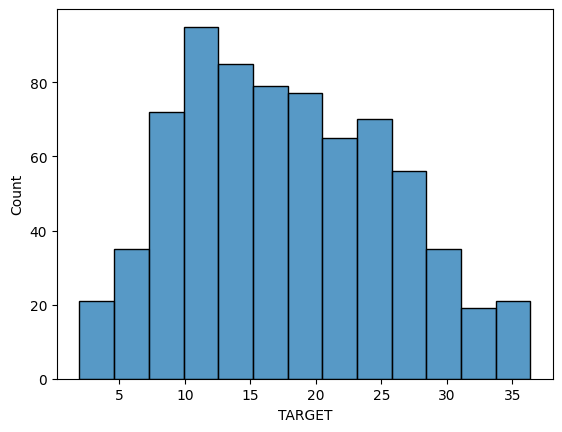

In [20]:
sns.histplot(x = train['TARGET'])
plt.show()

# 히스토그램을 활용한 온도(T) 분포 확인

In [21]:
train['T'].mean()

0.00520141538630137

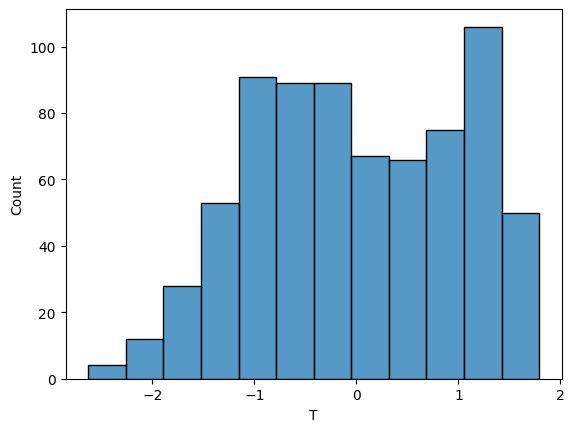

In [22]:
# 온도 데이터
axis_x = train['T']

# 히스토그램
sns.histplot(x = axis_x)
plt.show()

# 회귀선이 포함된 산점도
 - regplot()
 - 회귀선은 산점도 상의 데이터들을 대표하는 선으로, 두 변수 간의 추세를 보여줌

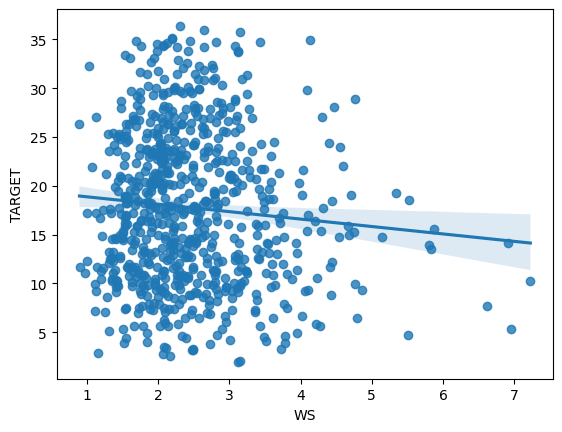

In [23]:
sns.regplot(x = train['WS'], y = train['TARGET'])
#                 풍속
plt.show()

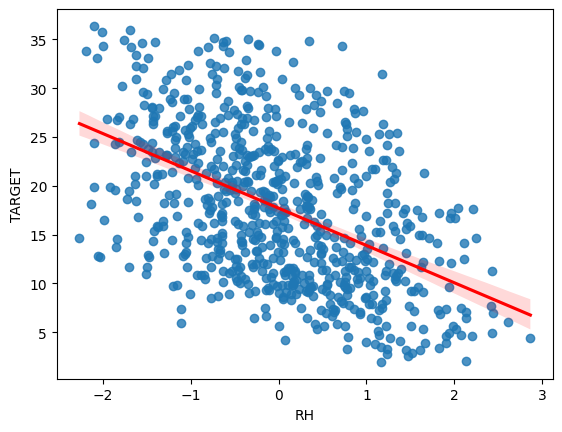

In [24]:
sns.regplot(x = train['RH'], y = train['TARGET'], line_kws = {'color' : 'red'})
#                 상대습도
plt.show()

# 상대습도가 증가할 때 타겟값의 음의 상관관계가 있다.

In [25]:
train_x = train.drop(['TARGET'], axis = 1)
train_y = train['TARGET']

# ID 열 제거
train_x = train_x.drop('ID', axis = 1)
test_x = test.drop('ID', axis = 1)

In [26]:
# DecisionTreeRegressor 모듈을 불러오는 코드입니다.
from sklearn.tree import DecisionTreeRegressor

# 불러온 모듈을 model 변수에 할당합니다.
model = DecisionTreeRegressor(random_state = 42)

# 학습을 진행합니다.
model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=42)

In [27]:
pred = model.predict(test_x)

In [28]:
submission['TARGET'] = pred
submission

,ID,TARGET
0,1,16.715483
1,2,28.071771
2,3,13.491569
3,4,23.075362
4,5,20.438856
...,...,...
360,361,13.780345
361,362,14.231793
362,363,10.248924
363,364,10.078131


In [29]:
submission.to_csv('submission.csv', index = False)

# 특성 간 상관 관계 확인

In [30]:
train.corr()

,ID,DHI,DNI,WS,RH,T,TARGET
ID,1.000000,0.050718,0.018302,-0.048168,-0.014074,0.043845,0.051372
DHI,0.050718,1.000000,-0.337424,-0.121559,0.139689,0.489096,0.346327
DNI,0.018302,-0.337424,1.000000,-0.012349,-0.619980,0.298397,0.726132
WS,-0.048168,-0.121559,-0.012349,1.000000,0.015007,-0.169799,-0.086688
RH,-0.014074,0.139689,-0.619980,0.015007,1.000000,-0.423290,-0.486821
T,0.043845,0.489096,0.298397,-0.169799,-0.423290,1.000000,0.689052
TARGET,0.051372,0.346327,0.726132,-0.086688,-0.486821,0.689052,1.000000


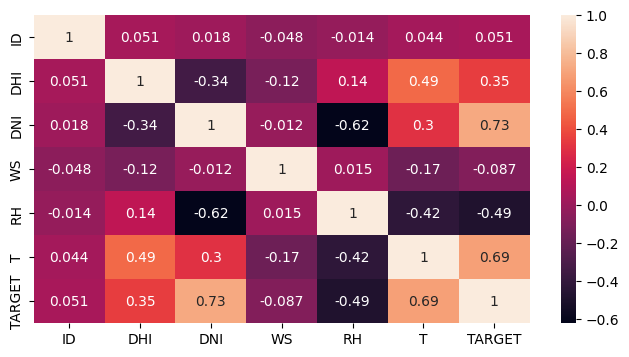

In [31]:
import seaborn as snsn
import matplotlib.pyplot as plt

# 이미지 크기 지정
plt.figure(figsize = (8, 4))

# annot = False : 각 셀의 수치가 표기되지 않는다
sns.heatmap(train.corr(), annot = True)
plt.show()

In [32]:
train_x = train.drop(['TARGET'], axis = 1)
train_y = train['TARGET']

train_x = train_x.drop('ID', axis = 1)
test_x = test.drop('ID', axis = 1)

In [33]:
# train_test_split() 학습 데이터와 검증 데이터 생성
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)
# 학습 세트의 독립 변수, 검증 세트의 독립 변수, 학 습세트의 종속 변수, 검증 세트의 종속 변수      시드

In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)

model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# feature_importances_ 속성은 각 피처의 중요도를 나타내는 값들로 구성된다
# feature_names_in_ 속성은 피처의 이름을 나태내는 값으로 구성된다

importances = model.feature_importances_
names = model.feature_names_in_

print(importances)
print(names)

[0.14263931 0.41747396 0.00590244 0.00640973 0.42757456]
['DHI' 'DNI' 'WS' 'RH' 'T']


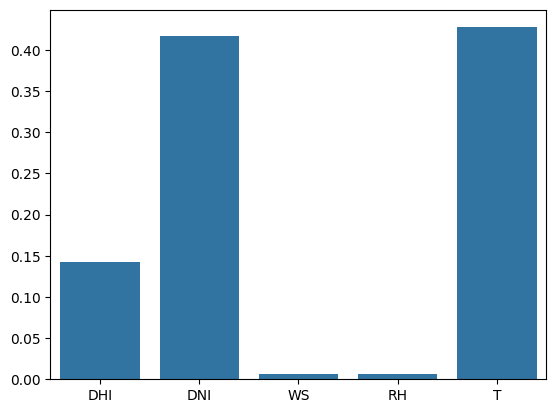

In [36]:
sns.barplot(x = names , y = importances)
plt.show()

# 검증 점수 확인

In [37]:
# 모델의 검증 데이터
val_predict = model.predict(x_valid)

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_valid, val_predict, squared = True)
#             실제 검증 타겟 값, 모델의 예측 값
# MSE 값은 작을 수록 모델의 예측이 실제 값과 가까운 것을 의미한다

1.9855301835937835

# 특성 공학
 - DHI, DNI은 TARGET 열과 양의 상관관계가 관찰됨
 - 두 열을 더하여 새로운 피처를 생성

In [4]:
# 데이터 불러오기
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [5]:
train['sunlight'] = train['DHI'] + train['DNI']
test['sunlight'] = test['DHI'] + test['DNI']

In [6]:
train_x = train.drop(['TARGET'], axis = 1)
train_y = train['TARGET']

train_x = train_x.drop('ID', axis = 1)
test_x = test.drop('ID', axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

In [8]:
# 의사 결정나무
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

decision = DecisionTreeRegressor(random_state = 42)
decision.fit(x_train, y_train)

decision_valid = decision.predict(x_valid)

mean_squared_error(y_valid, decision_valid, squared = True)

3.046787365011482

In [9]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state = 42)
forest.fit(x_train, y_train)

forest_valid = forest.predict(x_valid)

mean_squared_error(y_valid, forest_valid, squared = True)

1.3191833694477235

In [10]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 42)
xgb.fit(x_train, y_train)

xgb_valid = xgb.predict(x_valid)

mean_squared_error(y_valid, xgb_valid, squared = True)

1.681083652319253

# 하이퍼 파라미터 조정

In [11]:
forest_hyper = RandomForestRegressor(n_estimators = 150, max_depth = 12, min_samples_split = 2, random_state = 42)

forest_hyper.fit(x_train, y_train)

forest_hyper_valid = forest_hyper.predict(x_valid)

mean_squared_error(y_valid, forest_hyper_valid, squared = True)

1.3102928625799193

In [12]:
my_model = RandomForestRegressor(random_state = 42)

my_model.fit(x_train, y_train)

my_model_valid = my_model.predict(x_valid)

mean_squared_error(y_valid, my_model_valid, squared = True)

1.3191833694477235